<a href="https://colab.research.google.com/github/SamoaChen/Frequentist-ML/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

data = '/content/drive/My Drive/Colab Notebooks/ML_HW4/housing.csv'
housing = pd.read_csv(data, sep=',', header=0)
housing

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600,8.3252,41,880,129,322,126,37.88,-122.23
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100,1.5603,25,1665,374,845,330,39.48,-121.09
20636,77100,2.5568,18,697,150,356,114,39.49,-121.21
20637,92300,1.7000,17,2254,485,1007,433,39.43,-121.22
20638,84700,1.8672,18,1860,409,741,349,39.43,-121.32


In [ ]:
#-------------------SEPERATE TRAIN VALID AND TEST SETS
housing_train , housing_remain = train_test_split(housing, test_size=0.2, random_state=100, shuffle=True)
housing_valid , housing_test = train_test_split(housing_remain, test_size=0.5, random_state=100, shuffle=True)

#SEPERATE X AND Y VALUES
h_trainx = housing_train.drop(['median_house_value'], axis=1)
h_trainy = housing_train['median_house_value']

h_validx = housing_valid.drop(['median_house_value'], axis=1)
h_validy = housing_valid['median_house_value']

h_testx = housing_test.drop(['median_house_value'], axis=1)
h_testy = housing_test['median_house_value']

#STANDARDIZE DATA
h_trainx=(h_trainx-h_trainx.mean())/h_trainx.std(ddof=1)
h_validx=(h_validx-h_validx.mean())/h_validx.std(ddof=1)
h_testx=(h_testx-h_testx.mean())/h_testx.std(ddof=1)

In [ ]:
#-----------------XGBoost REGRESSION
#XGBOOST DEPTH OF 4
params = {'n_estimators': 249, 'max_depth': 2, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing4 = GradientBoostingRegressor(**params)
xgb_housing4.fit(h_trainx,h_trainy)

#XGBOOST DEPTH OF 6
params = {'n_estimators': 249, 'max_depth': 6, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing6 = GradientBoostingRegressor(**params)
xgb_housing6.fit(h_trainx,h_trainy)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=249,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#-----------------RANDOM ROREST REGRESSON
RF_params = {'n_estimators': 249, 'max_depth': 4, 'max_features':2, 'criterion': 'mse', 'random_state':42}
randforest = RandomForestRegressor(**RF_params)
randforest.fit(h_trainx, h_trainy)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=249, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#---------------ERROR FOR RANDOM FOREST PREDICTION GIVEN DEPTH OF 2 AND 6
#PREDICTION ERROR FRO M OF 2
#INITLIATE TEST SCORE ERRORS
RF2test_score = np.zeros((RF_params['n_estimators'],), dtype=np.float64)

for num in np.arange(RF_params['n_estimators']):
  new_params = {'n_estimators': num+1, 'max_depth': 4, 'max_features':2, 'criterion': 'mse', 'random_state':42}
  randforest_2 = RandomForestRegressor(**new_params)
  randforest_2.fit(h_trainx, h_trainy)
  y_pred = randforest_2.predict(h_testx)
  RF2test_score[num] = mean_squared_error(h_testy, y_pred)



In [ ]:
#PREDICTION ERROR FRO M OF 6
#INITLIATE TEST SCORE ERRORS
RF6test_score = np.zeros((RF_params['n_estimators'],), dtype=np.float64)

for num in np.arange(RF_params['n_estimators']):
  new_params = {'n_estimators': num+1, 'max_depth': 4, 'max_features':6, 'criterion': 'mse', 'random_state':42}
  randforest_6 = RandomForestRegressor(**new_params)
  randforest_6.fit(h_trainx, h_trainy)
  y_pred = randforest_6.predict(h_testx)
  RF6test_score[num] = mean_squared_error(h_testy, y_pred)

Text(0, 0.5, 'Deviance')

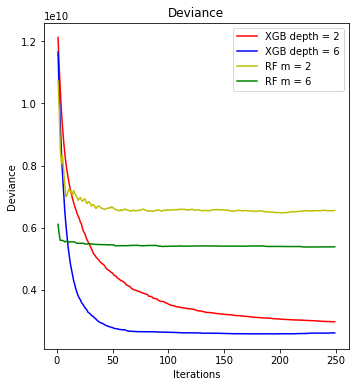

In [ ]:
#----------------DEVIANCE PLOT FOR TEST AND TRAIN DATA
#COMPUTE TEST SET DEVIANCE
XGB_test_score4 = np.zeros((params['n_estimators'],), dtype=np.float64)
XGB_test_score6 = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(xgb_housing4.staged_predict(h_testx)):
    XGB_test_score4[i] = xgb_housing4.loss_(h_testy, y_pred)

for i, y_pred in enumerate(xgb_housing6.staged_predict(h_testx)):
    XGB_test_score6[i] = xgb_housing6.loss_(h_testy, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')

plt.plot(np.arange(params['n_estimators']) + 1, XGB_test_score4, 'r-',
         label='XGB depth = 2')

plt.plot(np.arange(params['n_estimators']) + 1, XGB_test_score6, 'b-',
         label='XGB depth = 6')

plt.plot(np.arange(RF_params['n_estimators']) + 1, RF2test_score, 'y-',
         label='RF m = 2')

plt.plot(np.arange(RF_params['n_estimators']) + 1, RF6test_score, 'g-',
         label='RF m = 6')

plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Deviance')

Due to the size of the data set, XGBoost with a depth of 4 and XGBoost with a depth of 6 converged after 100 iteration. For better demonstration, a depth of 2 and a depth of 6 are being analyzed.

In [ ]:
#---------------REGRESSION FOR CALCULATING FEATURE IMPORTANCES
#XGBOOST DEPTH OF 6
params = {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing = GradientBoostingRegressor(**params)
xgb_housing.fit(h_trainx,h_trainy)

#RANDOM ROREST REGRESSON
RF_params = {'n_estimators': 800, 'max_depth': 4, 'max_features':6, 'criterion': 'mse', 'random_state':42}
randforest = RandomForestRegressor(**RF_params)
randforest.fit(h_trainx, h_trainy)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

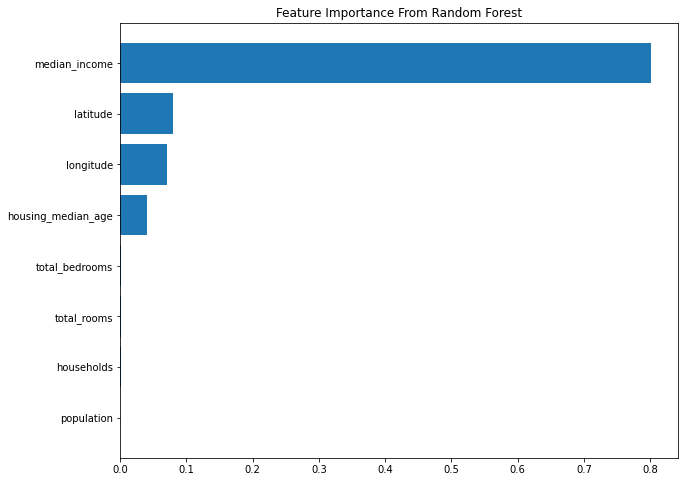

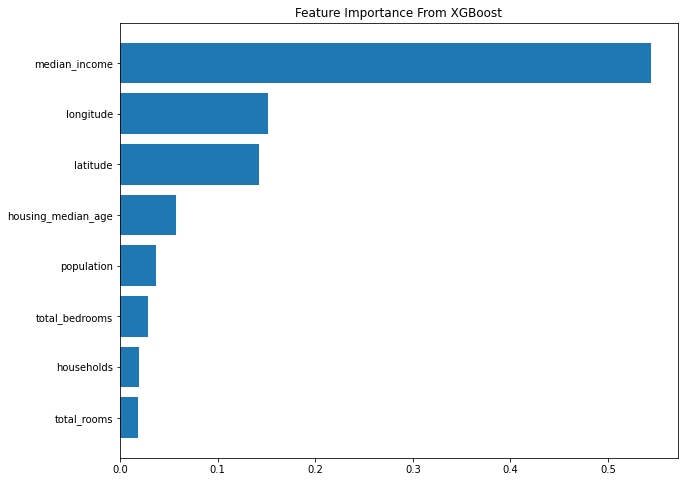

In [ ]:
#--------------FEATURE IMPORTANCE PREDICTED FROM RANDOM FOREST
feature_names = h_trainx.columns
feature_importance = randforest.feature_importances_
sorted_idx = feature_importance.argsort()
y_ticks = np.arange(0, h_trainx.shape[1])
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_ticks, feature_importance[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Feature Importance From Random Forest")
plt.show()
#---------------FEATURE IMPORTANCE PREDICTED FROM XGBOOST
feature_importance = xgb_housing.feature_importances_
sorted_idx = feature_importance.argsort()
y_ticks = np.arange(0, h_trainx.shape[1])
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_ticks, feature_importance[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Feature Importance From XGBoost")
plt.show()

Both methods predicted median income to be the most important feature followed by either longitude or latitude, and housing median age .
The feature importance predicted by random forest is much more concentrated than the importance predicted by XGBoost. Since most of weight are assigned to the most important feature.

In [ ]:
#----------------REPEAT THE ABOVE ANALYSIS ON FOREST FIRE DATA SET
ffire_file = '/content/drive/My Drive/Colab Notebooks/ML_HW5/forestfires.csv'
ffire = pd.read_csv(ffire_file, sep=',', header=0)
ffire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4,6,mar,sun,89.3,51.3,102.2,9.6,10.6,46,4.9,0.0,0.00
1,4,6,sep,thu,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00
2,3,5,mar,tue,88.1,25.7,67.6,3.8,14.9,38,2.7,0.0,0.00
3,3,5,aug,sat,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00
4,3,6,sep,sun,92.4,124.1,680.7,8.5,17.2,58,1.3,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
381,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
382,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
383,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
#----------------ADDING DUMMIES FOR WEEKDAYS
ffire.loc[ffire['day'] != 'mon', 'Mon'] = 0
ffire.loc[ffire['day'] == 'mon', 'Mon'] = 1

ffire.loc[ffire['day'] != 'tue', 'Tue'] = 0
ffire.loc[ffire['day'] == 'tue', 'Tue'] = 1

ffire.loc[ffire['day'] != 'wed', 'Wed'] = 0
ffire.loc[ffire['day'] == 'wed', 'Wed'] = 1

ffire.loc[ffire['day'] != 'thu', 'Thu'] = 0
ffire.loc[ffire['day'] == 'thu', 'Thu'] = 1

ffire.loc[ffire['day'] != 'fri', 'Fri'] = 0
ffire.loc[ffire['day'] == 'fri', 'Fri'] = 1

ffire.loc[ffire['day'] != 'sat', 'Sat'] = 0
ffire.loc[ffire['day'] == 'sat', 'Sat'] = 1

ffire.loc[ffire['day'] != 'sun', 'Sun'] = 0
ffire.loc[ffire['day'] == 'sun', 'Sun'] = 1

ffire = ffire.drop(columns =['day'])

Dummy variables are created for weekdays

In [ ]:
#----------------ADDING DUMMIES FOR MONTHS
ffire.loc[ffire['month'] != 'jan', 'Jan'] = 0
ffire.loc[ffire['month'] == 'jan', 'Jan'] = 1

ffire.loc[ffire['month'] != 'feb', 'Feb'] = 0
ffire.loc[ffire['month'] == 'feb', 'Feb'] = 1

ffire.loc[ffire['month'] != 'mar', 'Mar'] = 0
ffire.loc[ffire['month'] == 'mar', 'Mar'] = 1

ffire.loc[ffire['month'] != 'apr', 'Apr'] = 0
ffire.loc[ffire['month'] == 'apr', 'Apr'] = 1

ffire.loc[ffire['month'] != 'may', 'May'] = 0
ffire.loc[ffire['month'] == 'may', 'May'] = 1

ffire.loc[ffire['month'] != 'jun', 'Jun'] = 0
ffire.loc[ffire['month'] == 'jun', 'Jun'] = 1

ffire.loc[ffire['month'] != 'jul', 'Jul'] = 0
ffire.loc[ffire['month'] == 'jul', 'Jul'] = 1

ffire.loc[ffire['month'] != 'aug', 'Aug'] = 0
ffire.loc[ffire['month'] == 'aug', 'Aug'] = 1

ffire.loc[ffire['month'] != 'sep', 'Sep'] = 0
ffire.loc[ffire['month'] == 'sep', 'Sep'] = 1

ffire.loc[ffire['month'] != 'oct', 'Oct'] = 0
ffire.loc[ffire['month'] == 'oct', 'Oct'] = 1

ffire.loc[ffire['month'] != 'nov', 'Nov'] = 0
ffire.loc[ffire['month'] == 'nov', 'Nov'] = 1

ffire.loc[ffire['month'] != 'dec', 'Dec'] = 0
ffire.loc[ffire['month'] == 'dec', 'Dec'] = 1

ffire = ffire.drop(columns =['month'])

Dummy vairables are created for different month

In [ ]:
#-------------------SEPERATE TRAIN VALID AND TEST SETS
ffire_train , ffire_remain = train_test_split(ffire, test_size=0.2, random_state=100, shuffle=True)
ffire_valid , ffire_test = train_test_split(ffire_remain, test_size=0.5, random_state=100, shuffle=True)

#SEPERATE X AND Y VALUES
f_trainx = ffire_train.drop(['area'], axis=1)
f_trainy = ffire_train['area']

f_validx = ffire_valid.drop(['area'], axis=1)
f_validy = ffire_valid['area']

f_testx = ffire_test.drop(['area'], axis=1)
f_testy = ffire_test['area']


In [ ]:
#-----------------XGBoost REGRESSION
#XGBOOST DEPTH OF 4
params = {'n_estimators': 249, 'max_depth': 2, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing4 = GradientBoostingRegressor(**params)
xgb_housing4.fit(f_trainx,f_trainy)

#XGBOOST DEPTH OF 6
params = {'n_estimators': 249, 'max_depth': 4, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing6 = GradientBoostingRegressor(**params)
xgb_housing6.fit(f_trainx,f_trainy)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=249,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#-----------------RANDOM ROREST REGRESSON
RF_params = {'n_estimators': 249, 'max_depth': 3, 'max_features':2, 'criterion': 'mse', 'random_state':42}
randforest = RandomForestRegressor(**RF_params)
randforest.fit(f_trainx, f_trainy)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=249, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#---------------ERROR FOR RANDOM FOREST PREDICTION GIVEN DEPTH OF 2 AND 6
#PREDICTION ERROR FRO M OF 2
#INITLIATE TEST SCORE ERRORS
RF2test_score = np.zeros((RF_params['n_estimators'],), dtype=np.float64)

for num in np.arange(RF_params['n_estimators']):
  new_params = {'n_estimators': num+1, 'max_depth': 3, 'max_features':2, 'criterion': 'mse', 'random_state':42}
  randforest_2 = RandomForestRegressor(**new_params)
  randforest_2.fit(f_trainx, f_trainy)
  y_pred = randforest_2.predict(f_testx)
  RF2test_score[num] = mean_squared_error(f_testy, y_pred)

In [ ]:
#PREDICTION ERROR FRO M OF 6
#INITLIATE TEST SCORE ERRORS
RF6test_score = np.zeros((RF_params['n_estimators'],), dtype=np.float64)

for num in np.arange(RF_params['n_estimators']):
  new_params = {'n_estimators': num+1, 'max_depth': 3, 'max_features':4, 'criterion': 'mse', 'random_state':42}
  randforest_6 = RandomForestRegressor(**new_params)
  randforest_6.fit(f_trainx, f_trainy)
  y_pred = randforest_6.predict(f_testx)
  RF6test_score[num] = mean_squared_error(f_testy, y_pred)

Text(0, 0.5, 'Deviance')

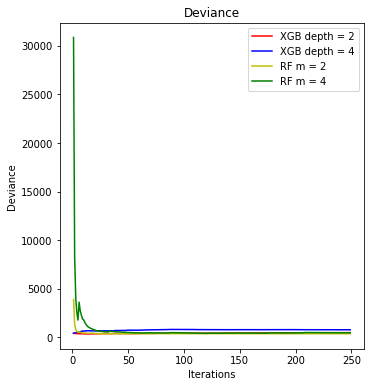

In [ ]:
#----------------DEVIANCE PLOT FOR TEST AND TRAIN DATA
#COMPUTE TEST SET DEVIANCE
XGB_test_score4 = np.zeros((params['n_estimators'],), dtype=np.float64)
XGB_test_score6 = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(xgb_housing4.staged_predict(f_testx)):
    XGB_test_score4[i] = xgb_housing4.loss_(f_testy, y_pred)

for i, y_pred in enumerate(xgb_housing6.staged_predict(f_testx)):
    XGB_test_score6[i] = xgb_housing6.loss_(f_testy, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')

plt.plot(np.arange(params['n_estimators']) + 1, XGB_test_score4, 'r-',
         label='XGB depth = 2')

plt.plot(np.arange(params['n_estimators']) + 1, XGB_test_score6, 'b-',
         label='XGB depth = 4')

plt.plot(np.arange(RF_params['n_estimators']) + 1, RF2test_score, 'y-',
         label='RF m = 2')

plt.plot(np.arange(RF_params['n_estimators']) + 1, RF6test_score, 'g-',
         label='RF m = 4')

plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Deviance')

This time the different between different methods are not that prominent, since the data sample size are very small. Most method reached a pateau score after 25 iterations

In [ ]:
#---------------REGRESSION FOR CALCULATING FEATURE IMPORTANCES
#XGBOOST DEPTH OF 6
params = {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.1, 'loss': 'ls', 'random_state':42}
xgb_housing = GradientBoostingRegressor(**params)
xgb_housing.fit(f_trainx,f_trainy)

#RANDOM ROREST REGRESSON
RF_params = {'n_estimators': 800, 'max_depth': 3, 'max_features':4, 'criterion': 'mse', 'random_state':42}
randforest = RandomForestRegressor(**RF_params)
randforest.fit(f_trainx, f_trainy)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

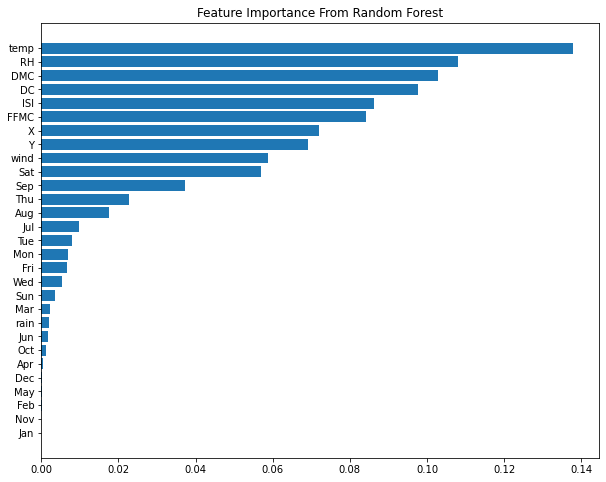

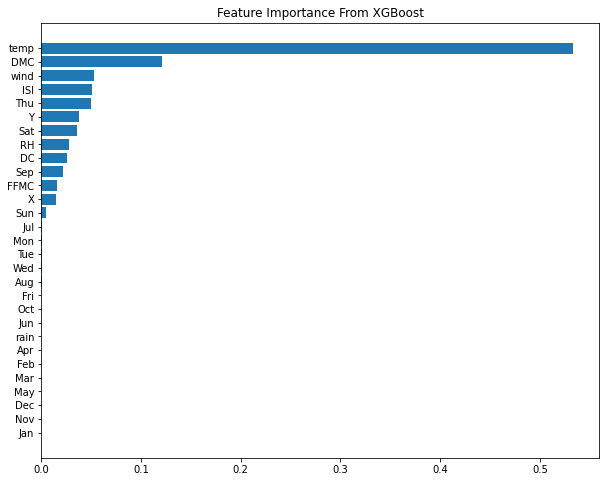

In [ ]:
#--------------FEATURE IMPORTANCE PREDICTED FROM RANDOM FOREST
feature_names = f_trainx.columns
feature_importance = randforest.feature_importances_
sorted_idx = feature_importance.argsort()
y_ticks = np.arange(0, f_trainx.shape[1])
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_ticks, feature_importance[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Feature Importance From Random Forest")
plt.show()
#---------------FEATURE IMPORTANCE PREDICTED FROM XGBOOST
feature_importance = xgb_housing.feature_importances_
sorted_idx = feature_importance.argsort()
y_ticks = np.arange(0, f_trainx.shape[1])
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_ticks, feature_importance[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Feature Importance From XGBoost")
plt.show()

Both random forest and XGBoost predicted temperature, DMC to part of the three most important features. However this time, the important values are much more distributed for random forest than the values for XGBoost. 